# Задания 
1. Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
2. Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
3. На каких платформах произошло больше всего релизов?
4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?
5. В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
6. Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?
8. Описание данных
# Имеются следующие поля:

* Rank – место по объему продаж
* Name – название игры
* Platform – платформа, на которой выпущена игра
* Year – год релиза
* Genre – жанр
* Publisher – издатель
* NA_Sales – продажи в Северной Америке, в млн.
* EU_Sales – продажи в Европе, в млн.
* JP_Sales – продажи в Японии, в млн.
* Other_Sales – продажи в остальном мире, в млн.
* Global_Sales – продажи по всему миру, в млн.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(30,16)}
)

In [2]:
p = 'games.csv'

In [3]:
df = pd.read_csv(p)

In [4]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [11]:
df.Year.mode()

0    2009.0
dtype: float64

In [27]:
df.Platform.value_counts(normalize=True).mul(100).to_frame('pct').query('pct > 7').index.to_list()

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS']

In [36]:
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Introversion Software              1
Epic Games                         1
Tryfirst                           1
Hello Games                        1
CPG Products                       1
Name: Publisher, Length: 576, dtype: int64

In [40]:
df1 = df[df.Publisher == 'Nintendo']

In [41]:
df1.agg(['mean','median'])

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,3801.864943,2003.83046,1.172055,0.601006,0.653721,0.136767,2.563836
median,2262.000000,2005.00000,0.375000,0.120000,0.280000,0.030000,0.920000


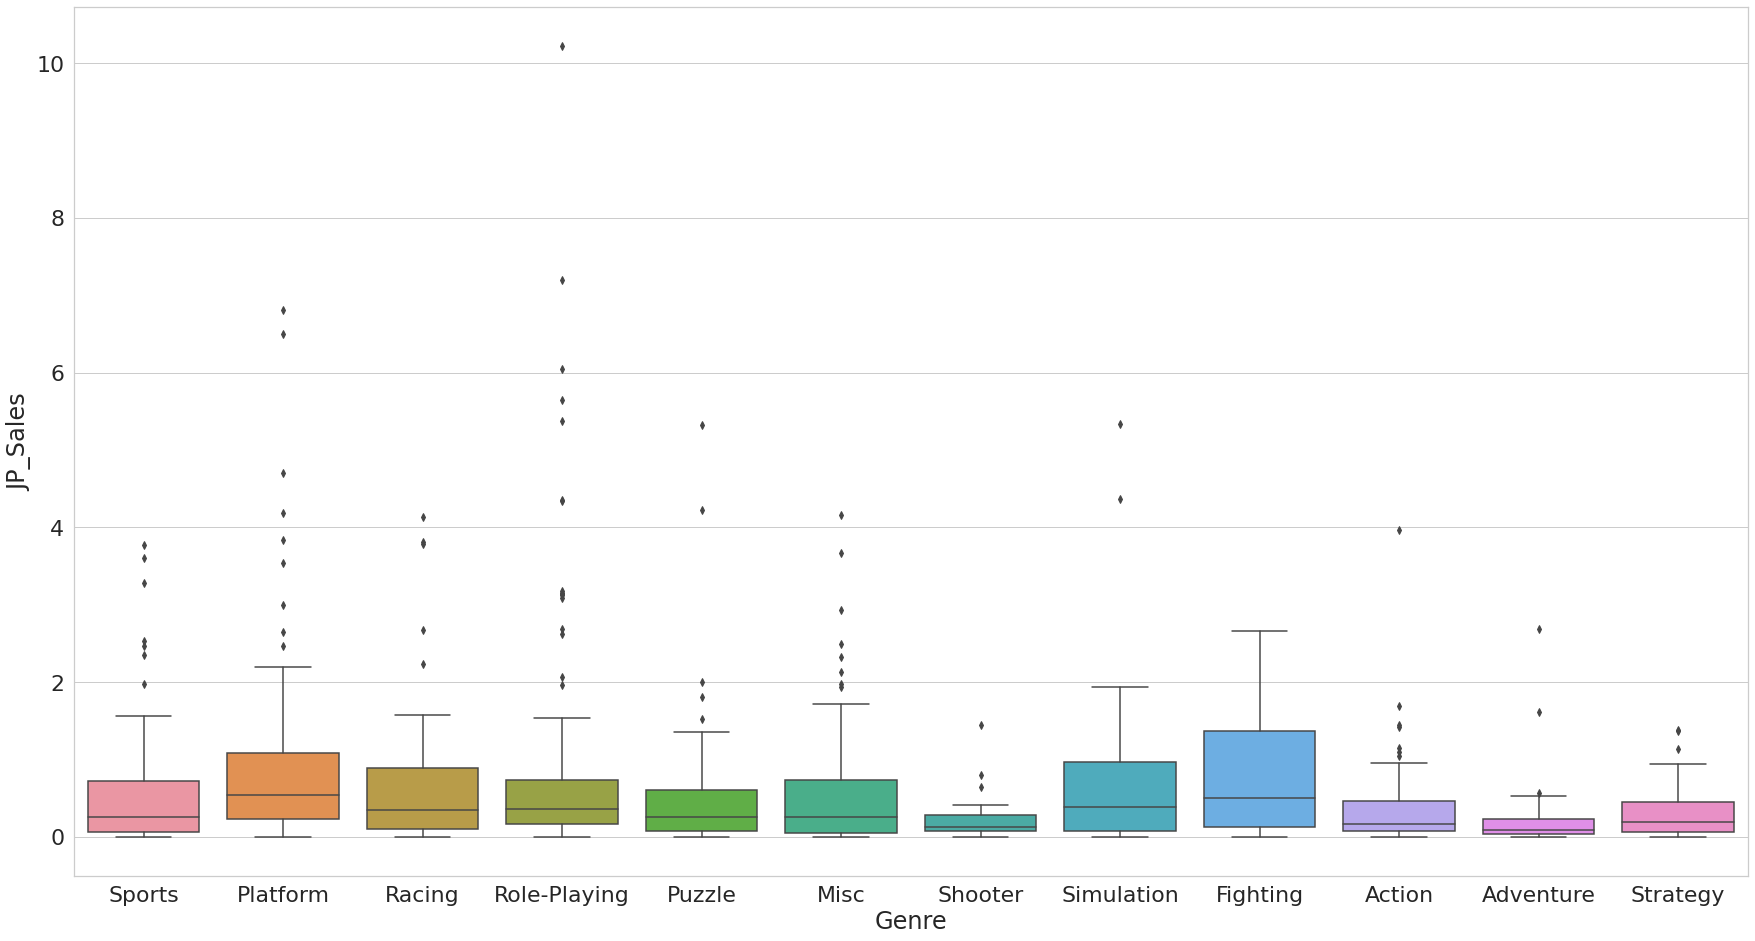

In [56]:
sns.boxplot(x = 'Genre', y = 'JP_Sales', data = df1)